<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/Customer_curn_Telekominikasyon_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Seti Açıklaması

Churn_Demo.txt                   : Müşteri ile ilgili kullanım, demografik ve terk etme durumu verilerinin yer aldığı veri setidir.

ID                               : Müşteri Numarası

Roaming                    : Dolaşımda Konuşma Süresi

International                    : Uluslararası Konuşma Süresi

Local                            : Yurt içi Konuşma Süresi

Dropped                          : Hat Düşme Sayısı

Paymethod                        : Ödeme Yöntemi

LocalPlan                        : Yurt içi Tarifesi

RoamingPlan                      : Dolaşım Tarifesi

Sex                              : Cinsiyet

Status                           : Medeni Durum 

Children                         : Çocuk Sayısı

Est_Income                       : Tahmini Gelir

Car_Owner                        : Araç Sahipliği

Usage                            : Kullanım

Age                              : Yaş

Overall Satisfaction             : Genel Memnuniyet Skoru

Churn                            : Müşteri Terk Durumu
-----------------
Comments_Demo.txt                : Müşterilerin çağrı merkezi görüşmelerindeki konuşma içeriklerinin yer aldığı dosyadır.
ID                               : Müşteri Numarası
Comments                         : Konuşma içeriği

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# pip install matplotlib --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV,\
HalvingRandomSearchCV, cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
# from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/churn_Demo.txt")
df

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,3824,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2070 non-null   int64  
 1   Roaming               2070 non-null   float64
 2   International         2070 non-null   float64
 3   Local                 2070 non-null   float64
 4   Dropped               2070 non-null   int64  
 5   Paymethod             2070 non-null   object 
 6   LocalPlan             2070 non-null   object 
 7   RoamingPlan           2070 non-null   object 
 8   Sex                   2070 non-null   object 
 9   Status                2070 non-null   object 
 10  Children              2070 non-null   int64  
 11  Est_Income            2070 non-null   float64
 12  Car_Owner             2070 non-null   object 
 13  Usage                 2070 non-null   float64
 14  Age                   2070 non-null   float64
 15  Overall Satisfaction 

In [ ]:
df.describe()

,ID,Roaming,International,Local,Dropped,Children,Est_Income,Usage,Age,Overall Satisfaction
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,1901.151691,16.129338,1.207295,59.080812,0.135749,1.147826,51464.262406,75.855063,42.798081,2.509662
std,1094.709118,9.866626,2.625421,57.542526,0.526189,0.843124,30796.680570,59.741635,14.883739,1.125157
min,1.000000,0.000000,0.000000,0.680000,0.000000,0.000000,96.330000,0.680000,12.326667,1.000000
25%,972.250000,8.090000,0.000000,15.200000,0.000000,0.000000,21084.700000,34.250000,30.886667,2.000000
50%,1874.000000,16.140000,0.000000,39.620000,0.000000,1.000000,55860.000000,57.110000,45.526667,2.000000
75%,2832.000000,22.990000,0.000000,87.460000,0.000000,2.000000,78000.000000,107.020000,54.013333,4.000000
max,3825.000000,59.000000,9.700000,332.460000,4.000000,2.000000,120000.000000,361.880000,77.000000,4.000000


In [ ]:
# mean ve std arasina bakilarak outlier yorumu yap.
# eger std > mean ise outlier olabilir veya yakin olmasi da problem olabilir

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.iloc[:,1:]

,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,23.56,0.00,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,29.78,0.00,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,24.81,0.00,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,5.03,0.00,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
2068,26.49,0.00,12.46,0,CC,FreeLocal,Standard,F,M,2,28220.80,N,38.95,38.766667,4,Vol


In [ ]:
df.iloc[:,1:].duplicated().sum() 
# id disinda hepsi aynimus
# bu test ve train de problem cikaracak ezberden cikarim yapacak 

648

In [ ]:
kc= df.iloc[:,1:].duplicated()

In [ ]:
df.isnull().sum()

ID                      0
Roaming                 0
International           0
Local                   0
Dropped                 0
Paymethod               0
LocalPlan               0
RoamingPlan             0
Sex                     0
Status                  0
Children                0
Est_Income              0
Car_Owner               0
Usage                   0
Age                     0
Overall Satisfaction    0
Churn                   0
dtype: int64

Current    1283
Vol         787
Name: Churn, dtype: int64


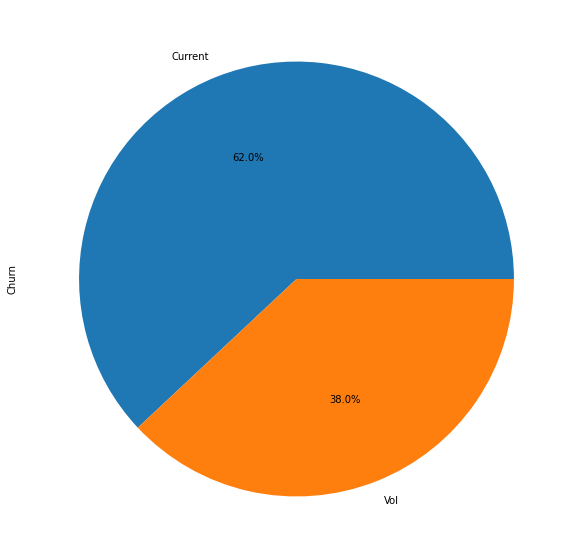

In [ ]:
print(df["Churn"].value_counts())
df["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
df[kc]

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
283,529,12.45,0.00,46.42,4,CC,FreeLocal,Standard,M,M,2,53010.80,N,58.87,18.840000,1,Current
287,535,9.65,0.00,6.33,0,CC,Budget,Intnl_discount,M,M,2,20078.00,N,15.98,32.846667,4,Current
292,549,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol
294,552,13.19,0.00,87.09,0,CC,FreeLocal,Standard,F,S,0,28589.10,N,100.28,15.600000,4,Vol
299,564,4.79,0.50,91.04,1,CC,Budget,Standard,F,M,2,67388.00,N,96.33,53.120000,3,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,3808,26.13,0.00,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
2065,3821,0.37,0.00,28.66,0,CC,FreeLocal,Standard,F,S,0,78851.30,N,29.04,48.373333,4,Vol
2066,3822,22.17,0.57,13.45,0,Auto,Budget,Standard,F,S,1,17540.70,Y,36.20,62.786667,1,Vol
2067,3823,28.92,0.00,45.47,0,CH,Budget,Standard,F,M,0,83891.90,Y,74.40,61.020000,4,Vol


In [ ]:
df1= df[~kc]

Current    807
Vol        615
Name: Churn, dtype: int64


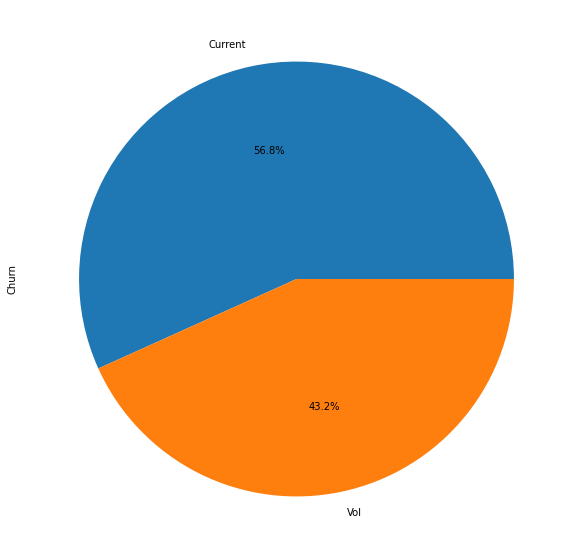

In [ ]:
print(df1["Churn"].value_counts())
df1["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
def check_out (df, col) :
  print(f"columns_name : {col}")
  print(df[col].value_counts())
  print("########################################"*2)
  print(f" # null_values: {df[col].isnull().sum()}")

  print("########################################"*2)
  print(f" uniques_values: {df[col].unique()[:10]} ")
  print(f" nun_uniques_values: {df[col].nunique()} ")
  print("*--"*45)

In [ ]:
# dropped icin binary yapabilrisin duscek dusmeyecek gibi.
# data etigi icin age cinsiyet gibi seylerin cikarillabilir durumu var data da bias i engeller
# 

In [ ]:
# roaming icin 3lu  gruplandirma yapabilirm ordinal

# ropped binary olabilir
# international dusebilir
# income gruplandirabilir

In [ ]:
for col in df1.columns:
  check_out(df1,col)

columns_name : ID
1       1
2218    1
2146    1
2145    1
2144    1
       ..
939     1
938     1
936     1
935     1
3825    1
Name: ID, Length: 1422, dtype: int64
################################################################################
 # null_values: 0
################################################################################
 uniques_values: [ 1  6  8 11 14 17 18 21 22 23] 
 nun_uniques_values: 1422 
*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
columns_name : Roaming
0.00     49
2.00     16
23.56    12
6.08     12
28.42    12
         ..
27.05     1
18.66     1
5.97      1
29.30     1
5.52      1
Name: Roaming, Length: 312, dtype: int64
################################################################################
 # null_values: 0
################################################################################
 uniques_values: [23.56 29.78 24.81 26.13  5.03 12.45 26.52 20.22 

In [ ]:
# notebookda tekrar olmasin
# aykiri degerlere bak
# feature enginnering bak

In [ ]:
df1

,ID,Roaming,International,Local,Dropped,Paymethod,LocalPlan,RoamingPlan,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,Overall Satisfaction,Churn
0,1,23.56,0.0,206.08,0,CC,Budget,Intnl_discount,F,S,1,38000.00,N,229.64,24.393333,3,Current
1,6,29.78,0.0,45.50,0,CH,FreeLocal,Standard,M,M,2,29616.00,N,75.29,49.426667,2,Current
2,8,24.81,0.0,22.44,0,CC,FreeLocal,Standard,M,M,0,19732.80,N,47.25,50.673333,3,Current
3,11,26.13,0.0,32.88,1,CC,Budget,Standard,M,S,2,96.33,N,59.01,56.473333,1,Current
4,14,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3798,0.87,0.0,11.52,0,Auto,FreeLocal,Intnl_discount,M,S,0,90321.60,N,12.39,28.000000,2,Current
2057,3799,18.02,0.0,136.47,0,CC,FreeLocal,Standard,M,D,0,90478.60,N,154.49,54.553333,1,Vol
2058,3800,8.09,0.0,13.74,0,CH,Budget,Standard,F,M,2,56187.00,N,21.83,43.000000,2,Current
2064,3811,5.03,0.0,23.11,0,CH,Budget,Intnl_discount,F,M,2,52004.80,N,28.14,25.140000,3,Current


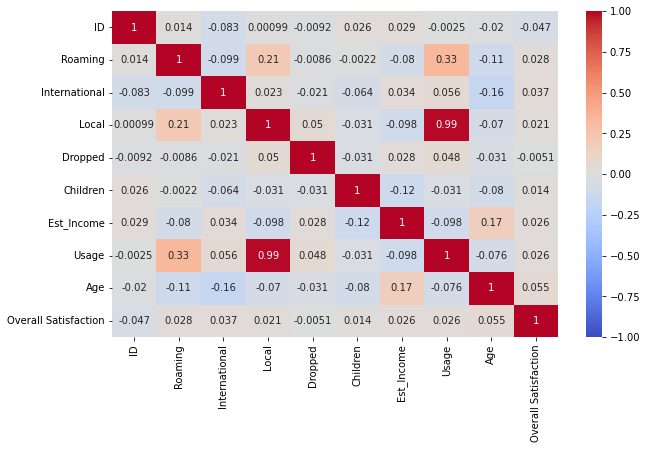

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

In [ ]:
# Usage = Local + international oldugu icin local ve international columlari drop edilebilir.
# usage il localin cor yuksek cikma sebebi international konusmalarin etkisinin az olmasi.

In [ ]:
df[["Local","Usage"]]

,Local,Usage
0,206.08,229.64
1,45.50,75.29
2,22.44,47.25
3,32.88,59.01
4,23.11,28.14
...,...,...
2065,28.66,29.04
2066,13.45,36.20
2067,45.47,74.40
2068,12.46,38.95


In [ ]:
num_col = []
for column in df1:
    if df1[column].dtypes!='object':
        	num_col.append(column) 

In [ ]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction']

In [ ]:
num_col.append("Churn") # first way

In [ ]:
num_col.extend(["Churn"])  # second way

In [ ]:
num_col = num_col + ["Churn"] # third way  

In [ ]:
num_col

['ID',
 'Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction',
 'Churn',
 'Churn',
 'Churn']

In [ ]:
num_col[1:]  # First

['Roaming',
 'International',
 'Local',
 'Dropped',
 'Children',
 'Est_Income',
 'Usage',
 'Age',
 'Overall Satisfaction',
 'Churn',
 'Churn',
 'Churn']

In [ ]:
num_col.pop(0)  # Second

'ID'

In [ ]:
for _ in range(2):
  num_col.pop()

In [ ]:
df_num = df1[num_col]

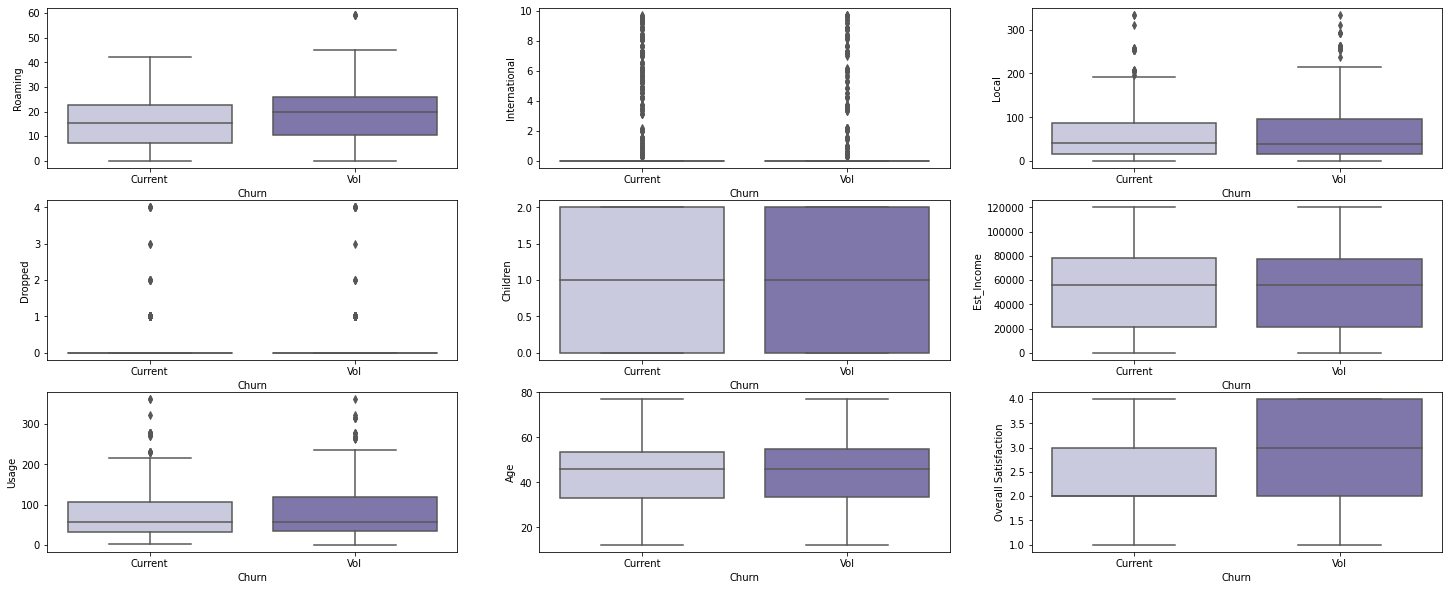

In [ ]:
plt.figure(figsize=(25,10))
for index, feature in enumerate(df_num):
    if feature != "Churn" and feature != "ID" :
        plt.subplot(3, 3, index+1)
        sns.boxplot(x='Churn',palette="Purples",y=feature, data=df_num)

In [ ]:
# churn e bakildiginda sag ve sol birbirine cok benziyor. columlar neredeyse biribirinin aynisi
# cok az kucuk farklar var 
# makina bunu ayristiramiyor.
# bu data classification iicn cok uygun bir data degil 

In [ ]:
# df1["Status"] = df1["Status"].astype("category")

In [ ]:
# df1["Car_Owner"] = df1["Car_Owner"].astype("bool")

In [ ]:
# df1["Car_Owner"].dtypes

In [ ]:
categ_columns = []
for col in df1.columns:
	if df1[col].dtypes == "object":
		categ_columns.append(col) 
        
print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Paymethod', 'LocalPlan', 'RoamingPlan', 'Sex', 'Status', 'Car_Owner', 'Churn']


In [ ]:
# matplotlip version ile alakali bu hata

In [ ]:
#pip install matplotlib --upgrade

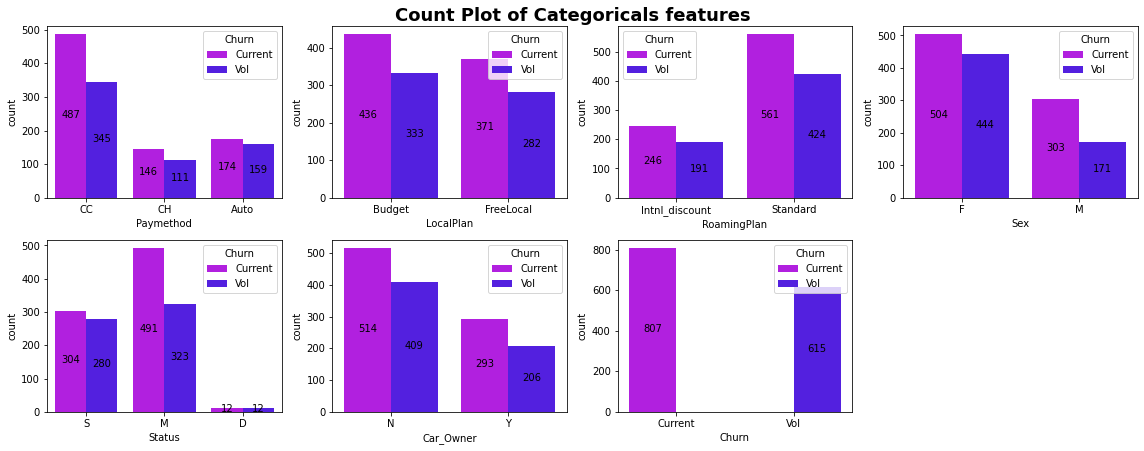

In [ ]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
for i , column in enumerate(categ_columns):
   ax = fig.add_subplot(5, 4, i+1);
   ax = sns.countplot(x=column, data=df1, hue="Churn", palette=sns.color_palette("gist_rainbow_r", 10)) 
   for val in ax.containers:
      # set the bar label based on the y-axis
      ax.bar_label(val, label_type='center', padding=1)
plt.tight_layout()

In [ ]:
# fig = plt.figure(figsize=[16,15])
# fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
# fig.subplots_adjust(top=0.92);
# fig.subplots_adjust(hspace=0.5, wspace=0.4);
# for i , columns in enumerate(categ_columns):
#     input = np.unique(df[columns] , return_counts = True)
#     col= 'input'
#     ax1 = fig.add_subplot(5, 4, i+1);
#     ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
#     #The below two lines of codes are used for percentage values.
#     # ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
#     # ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=8, fontdict={'weight': 'bold'})
#     ax1.set_title(f'{columns}')
#     ax1.set_xlabel(f'{columns}')
#     ax1.set_ylabel('Count')
#     ax1.bar_label(ax1.containers[0])

In [ ]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

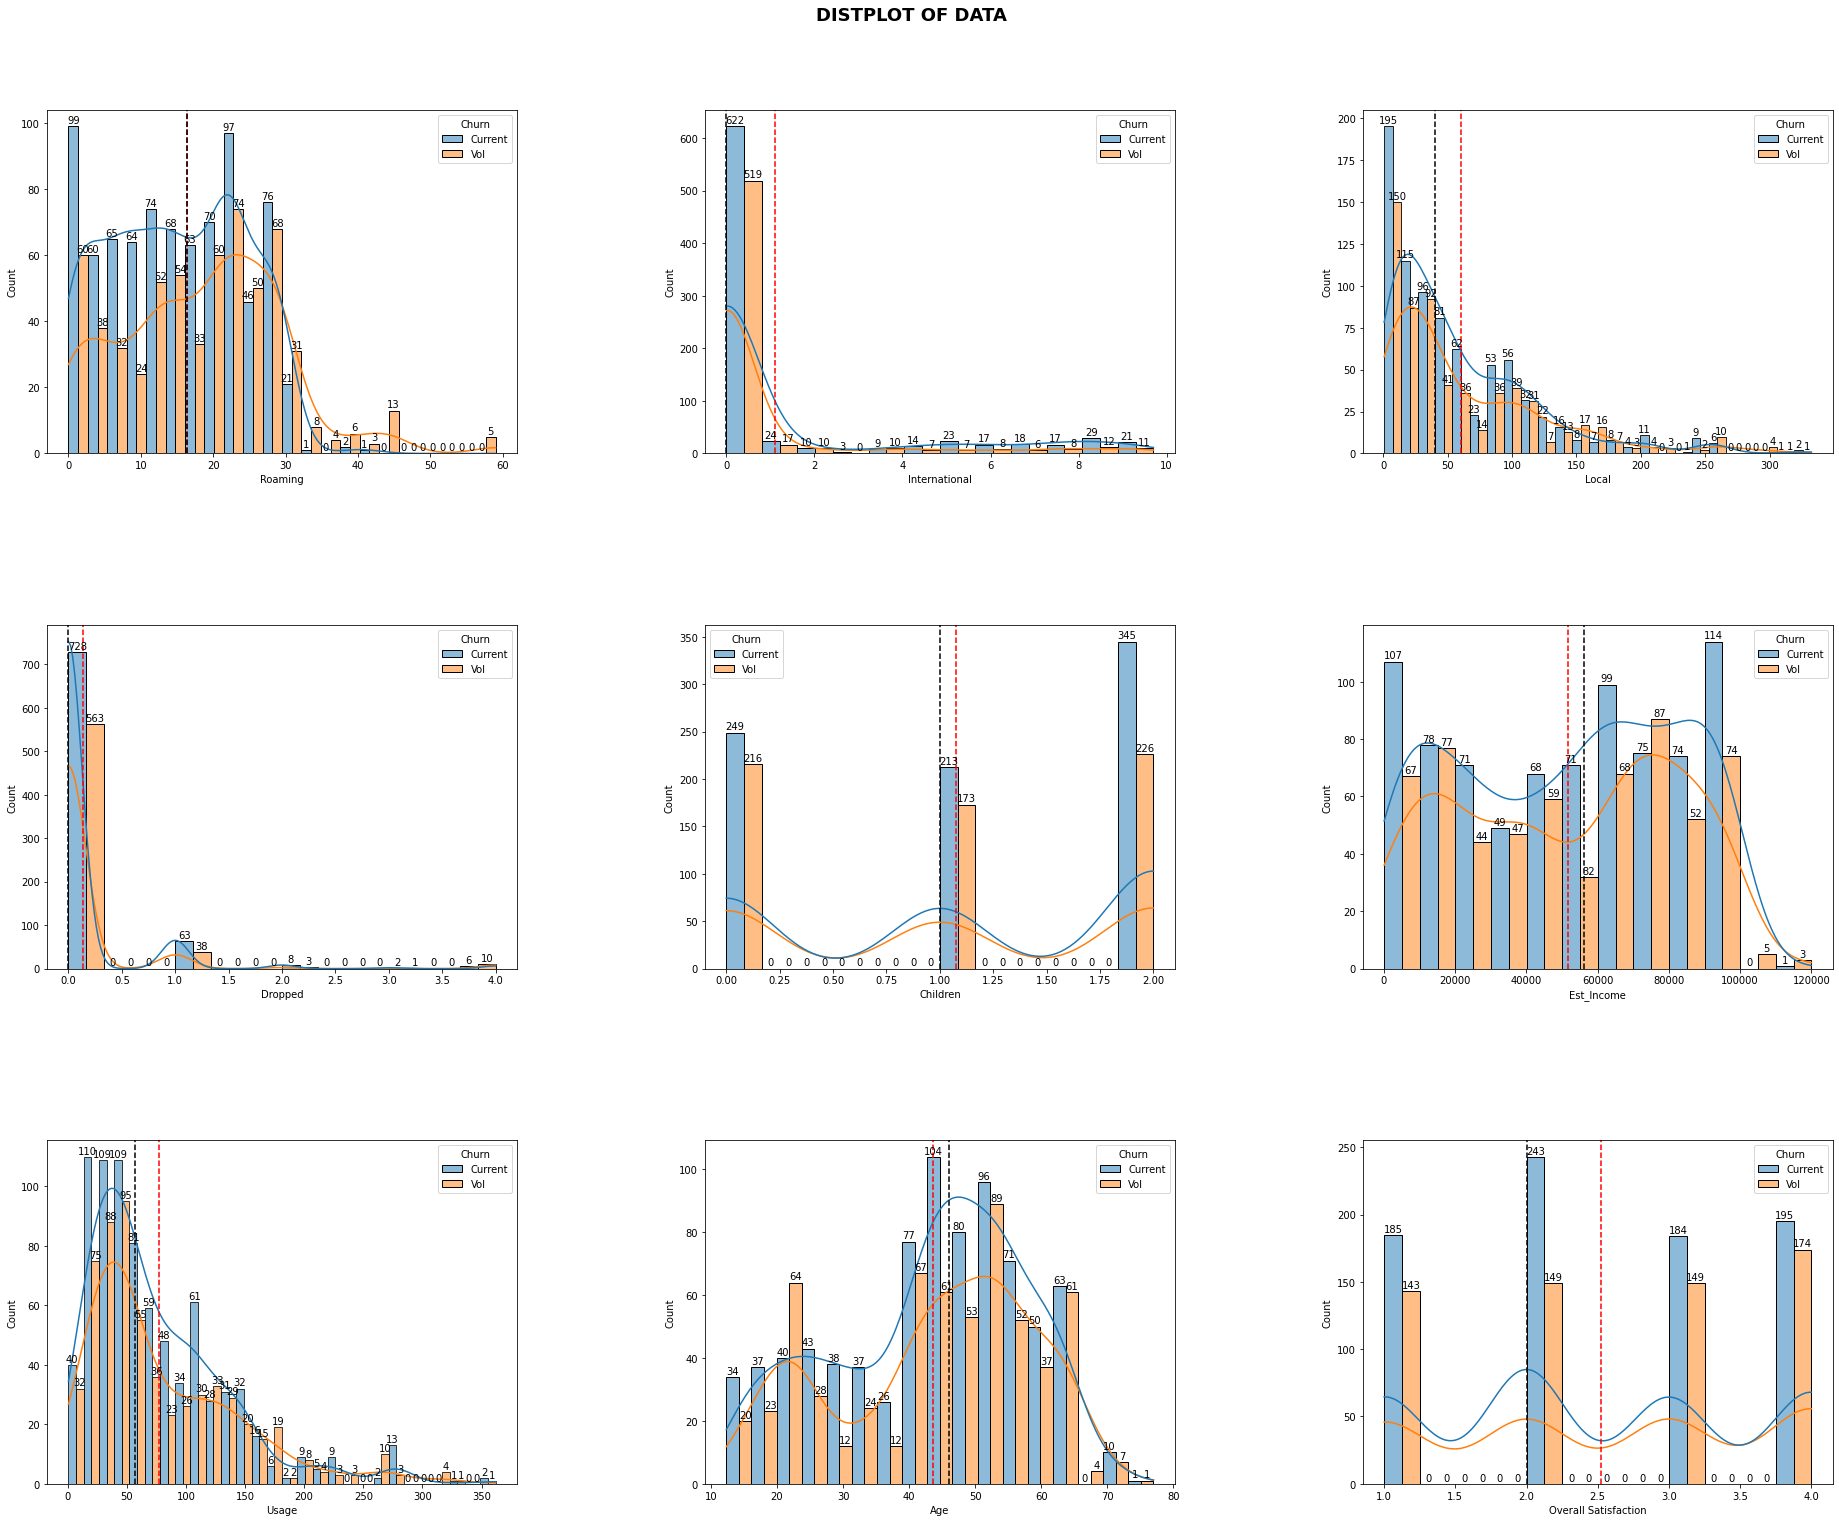

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col[:-1]):
    ax = fig.add_subplot(3, 3, i+1)
    ax = sns.histplot(x=df1[col],
                      color=colours[i],
                      hue=df1["Churn"],
                      kde=True, 
                      multiple="dodge")
    for val in ax.containers:
      # set the bar label based on the y-axis
      ax.bar_label(val, label_type='edge', padding=1)
    # ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df1[col].mean(),color='red',linestyle='--')
    ax.axvline(df1[col].median(),color='black',linestyle='--')
    # ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    # ax.set_xlabel(f'{col}')
    # ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}')
    # ax.legend(fontsize=10) 

In [ ]:
# curenrt ile val dagilimlarini target dagilimina bakabilirsin
# plotly de yaparsan color eklersen daha iyi olir
# her  feature n kendi icindeki dagilimi
# outlier degerlerimiz gorebiliyoruz onlari burdada kontrol ettik.

In [ ]:
# her featurn kendi icindeki churn sayilarini goruyoruz.

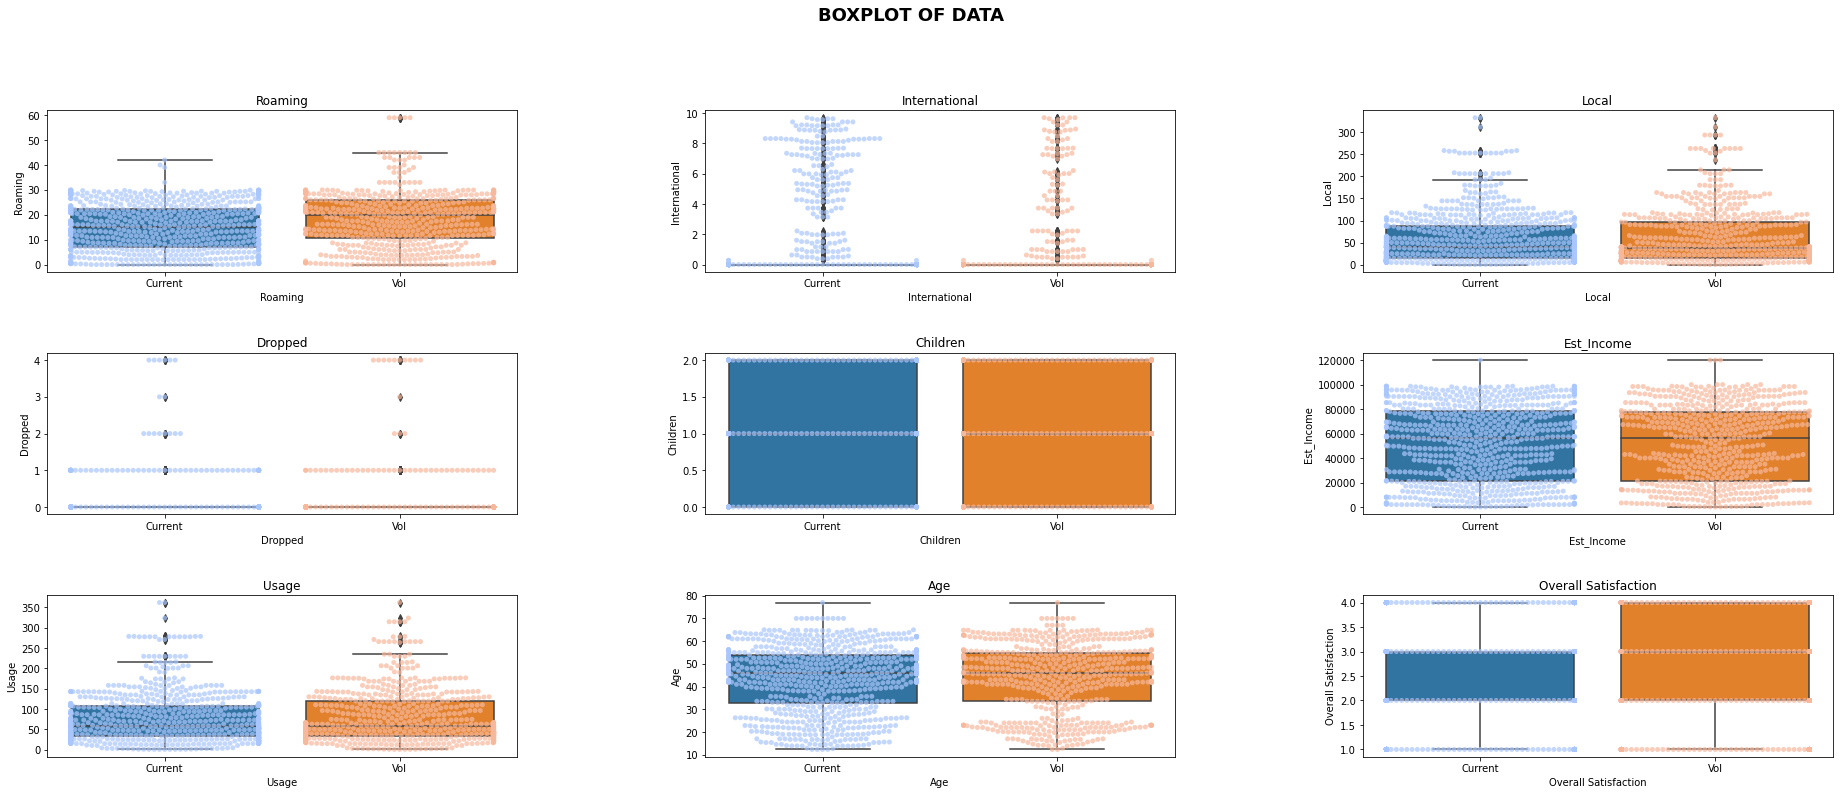

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_col[:-1]):  
    ax = fig.add_subplot(6,3, i+1);
    ax = sns.boxplot(data=df1, 
                     y=col,
                     x="Churn");
    ax = sns.stripplot(data=df1,    # you can use swarmplot also bu it will take mauch time to draw
                       y=col,
                       x="Churn",
                       alpha=0.7,
                       palette="coolwarm") 
    ax.set_title(f'{col}') 
    ax.set_xlabel(f'{col}')

In [ ]:
# featurelarin kendi dagilimlarina baktik
# outloir kontrol ediliyor.
# mesela international gorsume zaten cok az , burda ki ufak gorusme bile outlier gozukuyor ama degil.

# feature engineering

- roaming 0 to median --> 0, median to 30 --> 1, rst -->2
- esttimated income split in to 3 according to income levels
- age divide into 4 bins
- international --> not_used=0, used>0 
- dropped --> not_droped=0, dropped>0

In [ ]:
%%time
df1.columns.str.lower().str.strip().str.replace(" ", "_")

CPU times: user 1.87 ms, sys: 0 ns, total: 1.87 ms
Wall time: 2.13 ms


Index(['id', 'roaming', 'international', 'local', 'dropped', 'paymethod',
       'localplan', 'roamingplan', 'sex', 'status', 'children', 'est_income',
       'car_owner', 'usage', 'age', 'overall_satisfaction', 'churn'],
      dtype='object')

In [ ]:
%%time
df1.columns.to_series().apply(lambda col: col.lower().strip().replace(" ", "_"))

CPU times: user 906 µs, sys: 0 ns, total: 906 µs
Wall time: 918 µs


ID                                        id
Roaming                              roaming
International                  international
Local                                  local
Dropped                              dropped
Paymethod                          paymethod
LocalPlan                          localplan
RoamingPlan                      roamingplan
Sex                                      sex
Status                                status
Children                            children
Est_Income                        est_income
Car_Owner                          car_owner
Usage                                  usage
Age                                      age
Overall Satisfaction    overall_satisfaction
Churn                                  churn
dtype: object

In [ ]:
%%time
new_col= []
for col in df1.columns:
  col = col.lower()
  col = col.strip()
  col = col.replace(" ", "_")
  new_col.append(col)

df1.columns = new_col  
  

CPU times: user 487 µs, sys: 0 ns, total: 487 µs
Wall time: 507 µs


In [ ]:
df1.roaming

0       23.56
1       29.78
2       24.81
3       26.13
4        5.03
        ...  
2056     0.87
2057    18.02
2058     8.09
2064     5.03
2069    13.19
Name: roaming, Length: 1422, dtype: float64

In [ ]:
#  special function for roaming
# def formatter(df, col):
#   result = []
#   for value in df[col]:
#     if value < df[col].median():
#       result.append(0)
#     elif value < 30:
#       result.append(1)
#     else:
#       result.append(2)
#   return pd.Series(result)

In [ ]:
#  genaral function for all. 
def bin_formatter(df, col, first, second , third):
  result = []
  for value in df[col]:
    if value < first:
      result.append(0)
    elif value < second:
      result.append(1)
    elif value <= third:
      result.append(2)
    else:
      result.append(3)
  return pd.Series(result, index=df[col].index)

In [ ]:
bin_formatter(df1,"roaming", df1.roaming.median(), 30,df1.roaming.max()).value_counts()

0    708
1    667
2     47
dtype: int64

In [ ]:
bin_formatter(df1,"age", 23, 39, 65).value_counts()

2    961
1    235
0    203
3     23
dtype: int64

Generation,2021 Debt,Number of Cards
Generation Z (18-23),$2312,1.7
Millennials (24-39),$4569,2.7
Generation X (40-55),$7236,3.3
Baby boomers (56-74),$6230,3.4
Silent generation (75+),$3821,2.7


In [ ]:
pd.read_csv("age.txt")

,Generation,2021 Debt,Number of Cards
0,Generation Z (18-23),$2312,1.7
1,Millennials (24-39),$4569,2.7
2,Generation X (40-55),$7236,3.3
3,Baby boomers (56-74),$6230,3.4
4,Silent generation (75+),$3821,2.7


35k , 85k income thresholds

In [ ]:
bin_col = ["age", "roaming", "est_income"]

for col in bin_col:
  if col == "age":
    df1.age = bin_formatter(df1,"age", 23, 39, 65)
  elif col == "roaming":
    df1.roaming = bin_formatter(df1,"roaming", df1.roaming.median(), 30, df1.roaming.max())
  else:
    df1.est_income = bin_formatter(df1,"est_income", 35_000, 85_000, df1.est_income.max())

  


In [ ]:
df1.dropped.map(lambda x: "dropped" if x>0 else "not_dropped")

0       not_dropped
1       not_dropped
2       not_dropped
3           dropped
4       not_dropped
           ...     
2056    not_dropped
2057    not_dropped
2058    not_dropped
2064    not_dropped
2069    not_dropped
Name: dropped, Length: 1422, dtype: object

In [ ]:
df1.international.map(lambda x: "used" if x>0 else "not_used").value_counts()

not_used    1112
used         310
Name: international, dtype: int64

In [ ]:
bool_col = ["dropped", "international"]

for col in bool_col:
  if col == "dropped":
    df1.dropped = df1.dropped.map(lambda x: "dropped" if x>0 else "not_dropped")
  else:
    df1.international = df1.international.map(lambda x: "used" if x>0 else "not_used")



In [ ]:
df1

,id,roaming,international,local,dropped,paymethod,localplan,roamingplan,sex,status,children,est_income,car_owner,usage,age,overall_satisfaction,churn
0,1,1,not_used,206.08,not_dropped,CC,Budget,Intnl_discount,F,S,1,1,N,229.64,1,3,Current
1,6,1,not_used,45.50,not_dropped,CH,FreeLocal,Standard,M,M,2,0,N,75.29,2,2,Current
2,8,1,not_used,22.44,not_dropped,CC,FreeLocal,Standard,M,M,0,0,N,47.25,2,3,Current
3,11,1,not_used,32.88,dropped,CC,Budget,Standard,M,S,2,0,N,59.01,2,1,Current
4,14,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,1,Vol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,3798,0,not_used,11.52,not_dropped,Auto,FreeLocal,Intnl_discount,M,S,0,2,N,12.39,1,2,Current
2057,3799,1,not_used,136.47,not_dropped,CC,FreeLocal,Standard,M,D,0,2,N,154.49,2,1,Vol
2058,3800,0,not_used,13.74,not_dropped,CH,Budget,Standard,F,M,2,1,N,21.83,2,2,Current
2064,3811,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,3,Current


In [ ]:
df1.drop(columns=['id'], inplace=True)

In [ ]:
df1.columns

Index(['roaming', 'international', 'local', 'dropped', 'paymethod',
       'localplan', 'roamingplan', 'sex', 'status', 'children', 'est_income',
       'car_owner', 'usage', 'age', 'overall_satisfaction', 'churn'],
      dtype='object')

In [ ]:
df1.est_income.value_counts(dropna=False)

1    691
0    482
2    249
Name: est_income, dtype: int64

In [ ]:
df1.corr()

,roaming,local,children,est_income,usage,age,overall_satisfaction
roaming,1.000000,0.235752,0.004824,-0.066984,0.323658,-0.217471,0.039977
local,0.235752,1.000000,-0.023436,-0.060750,0.988666,-0.114226,0.012164
children,0.004824,-0.023436,1.000000,-0.122790,-0.022242,-0.017552,0.015374
est_income,-0.066984,-0.060750,-0.122790,1.000000,-0.062262,0.153981,0.014303
usage,0.323658,0.988666,-0.022242,-0.062262,1.000000,-0.126897,0.016217
age,-0.217471,-0.114226,-0.017552,0.153981,-0.126897,1.000000,0.034554
overall_satisfaction,0.039977,0.012164,0.015374,0.014303,0.016217,0.034554,1.000000


In [ ]:
# df corr icinde churn yok ncode et sonra yeniden dene 

In [ ]:
enc = {"Vol":1, "Current":0}  
df1["churn"] = df1["churn"].replace(enc)

In [ ]:
df1.churn.value_counts()

0    807
1    615
Name: churn, dtype: int64

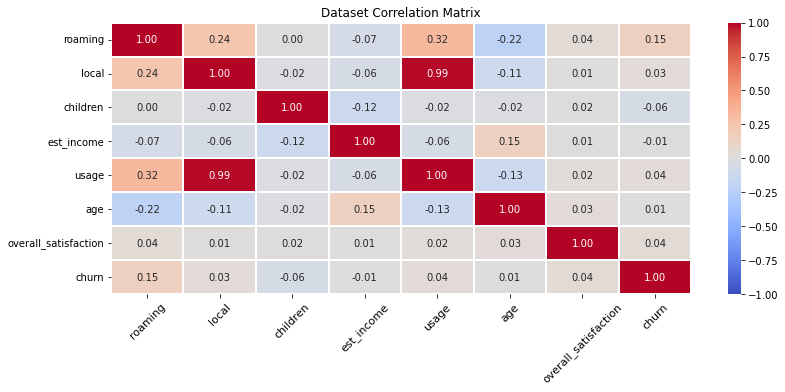

In [ ]:
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df1.corr(), ax=ax, vmin=-1, vmax=1, annot=True, linewidths=0.05, fmt= '.2f',cmap='coolwarm')
ax.tick_params(axis='x', which='major', labelsize=11, rotation=45)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [ ]:
df1.to_csv("ready_to_model.csv", index=False)

# Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/ready_to_model.csv")
data

,roaming,international,local,dropped,paymethod,localplan,roamingplan,sex,status,children,est_income,car_owner,usage,age,overall_satisfaction,churn
0,1,not_used,206.08,not_dropped,CC,Budget,Intnl_discount,F,S,1,1,N,229.64,1,3,0
1,1,not_used,45.50,not_dropped,CH,FreeLocal,Standard,M,M,2,0,N,75.29,2,2,0
2,1,not_used,22.44,not_dropped,CC,FreeLocal,Standard,M,M,0,0,N,47.25,2,3,0
3,1,not_used,32.88,dropped,CC,Budget,Standard,M,S,2,0,N,59.01,2,1,0
4,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0,not_used,11.52,not_dropped,Auto,FreeLocal,Intnl_discount,M,S,0,2,N,12.39,1,2,0
1418,1,not_used,136.47,not_dropped,CC,FreeLocal,Standard,M,D,0,2,N,154.49,2,1,1
1419,0,not_used,13.74,not_dropped,CH,Budget,Standard,F,M,2,1,N,21.83,2,2,0
1420,0,not_used,23.11,not_dropped,CH,Budget,Intnl_discount,F,M,2,1,N,28.14,1,3,0


In [ ]:
data, predict = \
              np.split(data.sample(frac=1, random_state=42), 
                       [int(.95*len(data))])

In [ ]:
X = data.drop("churn", axis=1)
y = data.churn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

- ordinal  encoding in 3 oneli ozelligi
   - feature importance olmasi gereken sekilde siralanmasini saglior mesela burda once one hot encoding yaptigimda sex m en entkisiz feature olurken
   - sex f en etkili feature oldu oysaki burda encodingler kullanilsaydi bir birine daha yakin yerlerde olurdu siralamalari.
   -

In [ ]:
# df_dummy= pd.get_dummies(df)
# buna dikkat et data lekage sebep vercek bir hareket 
# ordinal encoding yapman lazim data lekage ortaya cikiyor gormemeisi gereken kismi gormus 
# bu encoding yapman lazim 
# one hot encoing ya da label encoding yap

- ordinal encoder = egr bizim datamizdaki sutunlar bir kesikli continues ise ( aralik var ise 78-90 arasi a puani gibi) veya bir biri uzerine ustunluk belirten,boyut belirten durum var ise (l,smal ,xl gibi),(derecelendirmeler 1.,2., 3. gibi) 
- one hot = nominal kategorik verilerde (cinsiyet ayirirken , renk ayirrken , ustunluk olmayan durumlarda kullanilir)
- get dummy = featurdaki verileri alir ayri ayri feature a donusturr matematiksel deger ver. mesela erkek ve kadin varsa erkek ve kadin icin ayri ayri sutun olusturur eger kisi erkek ise orda 1 diger yerlerde 0 donduurur gibi.

In [ ]:
cate_cols = X.select_dtypes(include="O").columns
cate_cols

Index(['international', 'dropped', 'paymethod', 'localplan', 'roamingplan',
       'sex', 'status', 'car_owner'],
      dtype='object')

In [ ]:
# endcoderi pipeline a koy 
# bu islemlere bile gerek yok

In [ ]:
# pipeline kullanmam lazim burda data lekage engelleyecek 

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False,drop="first"), cate_cols), 
                                        remainder= MinMaxScaler()) 

# Modelling

In [ ]:
def model_scorer(model, X_train, y_train, X_test, y_test):
    """ take predictions from model and calculates the scores for train and the
        test sets.
    """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
!pip install pdi

## Logistic Regression

In [ ]:
operations = [("preprocessor", column_trans), ("Log_model", LogisticRegression(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.600000,0.633333
Precision,0.571429,0.650000
Recall,0.291845,0.333333
f1,0.386364,0.440678


In [ ]:
# recall en onemli metrigimiz dogru tahmin etmek onemli. 
# tahminimiz yuzde 56 ama biz yuzde 38 dogru tahmin etmisiz

In [ ]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

test_accuracy      0.571296
train_accuracy     0.601955
test_precision     0.521611
train_precision    0.575068
test_recall        0.259621
train_recall       0.294224
test_f1            0.342230
train_f1           0.388550
dtype: float64

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(class_weight="balanced", random_state = 42))]
pipe_model_log_grid = Pipeline(steps=operations)

In [ ]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

param_grid = {"logm__penalty" : penalty,
             "logm__l1_ratio" : l1_ratio,
             "logm__C" : C,
             "logm__solver" : solver
             }

In [ ]:
# grid_log_model = RandomizedSearchCV(pipe_model_log_grid, param_distributions=param_grid, scoring="recall", cv=10)

In [ ]:
grid_log_model = HalvingRandomSearchCV(pipe_model_log_grid, param_distributions=param_grid, scoring="recall", cv=10, n_jobs=-1)

In [ ]:
grid_log_model.fit(X_train,y_train)

HalvingRandomSearchCV(cv=10,
                      estimator=Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder=MinMaxScaler(),
                                                                   transformers=[('onehotencoder',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore',
                                                                                                sparse=False),
                                                                                  Index(['international', 'dropped', 'paymethod', 'localplan', 'roamingplan',
       'sex', 'status', 'car_owner'],
      dtype='object'))])),
                                                ('logm',
                                                 LogisticRegres...
                                           'logm__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                           'logm__penalty': ['l1', 'l2',
                                                             'elasticnet'],
                                           'logm__solver': ['lbfgs',
                                                            'liblinear',
                                                            'newton-cg',
                                                            'newton-cholesky',
                                                            'sag', 'saga']},
                      scoring='recall')

In [ ]:
eval_metric(grid_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[97 56]
 [56 61]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       153
           1       0.52      0.52      0.52       117

    accuracy                           0.59       270
   macro avg       0.58      0.58      0.58       270
weighted avg       0.59      0.59      0.59       270


Train_Set
[[367 247]
 [214 252]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       614
           1       0.51      0.54      0.52       466

    accuracy                           0.57      1080
   macro avg       0.57      0.57      0.57      1080
weighted avg       0.58      0.57      0.57      1080



In [ ]:
model_scorer(grid_log_model, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.592593,0.607407
Precision,0.557522,0.596491
Recall,0.270386,0.290598
f1,0.364162,0.390805


In [ ]:
grid_log_model.best_params_

{'logm__solver': 'newton-cholesky',
 'logm__penalty': 'l2',
 'logm__l1_ratio': 0.5789473684210527,
 'logm__C': 10000000000.0}

In [ ]:
plot_roc_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
plot_precision_recall_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
log_acc = log_scorer["test_set"][0]

# Xg_Boost

In [ ]:
#  pipe line kullan burda da 

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
pipe_model_Xgboost.fit(X_train, y_train)
model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)

In [ ]:
xgb_params = {"Xgboost__n_estimators": [50, 100, 150],
             "Xgboost__subsample":[0.6,0.8,1],
             "Xgboost__max_depth":[3,5,7],
             "Xgboost__learning_rate":[0.1,0.001,0.01]}

In [ ]:
xgb_grid_model = GridSearchCV(pipe_model_Xgboost , xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
xgb_grid_model.best_params_

In [ ]:
# grid yerine optuna kullan. sonra grid dene

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,
                                                                    random_state=42,
                                                                    learning_rate = 0.1, 
                                                                    max_depth = 5, 
                                                                    n_estimators= 100, 
                                                                    subsample= 0.8))]
pipe_final_xgb_model = Pipeline(steps=operations)

In [ ]:
pipe_final_xgb_model.fit(X_train, y_train)
xgb_scorer = model_scorer(pipe_final_xgb_model, X_train, y_train, X_test, y_test)
xgb_scorer

In [ ]:
plot_roc_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
plot_precision_recall_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
#  trasehold ile oyna  , degeisik agirliklari dene ayri ayri dene.

In [ ]:
xb_acc = xgb_scorer["test_set"][0]

In [ ]:
pipe_final_xgb_model.steps[1][1].feature_importances_

In [ ]:
feats = pd.DataFrame(index=X.columns, data=pipe_final_xgb_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# # # 

In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/Data/Comments_Demo.csv')

In [ ]:
df2 = df0.copy()
df2.sample(13)

In [ ]:
""" def split_sep(x):
  if x.__contains__(","):
      return x.split(",")[0]
  elif x.__contains__("\|") :
      return x.split("\|")[0]
df["id"] = df["ID,Comments"].apply(split_sep)"""

In [ ]:
"""def split_sep1(x):
  if x.__contains__(","):
      return x.split(",")[1]
  elif x.__contains__("\|") :
      return x.split("\|")[1]
df["Comments"] = df["ID,Comments"].apply(split_sep1)"""

In [ ]:
df2["ID,Comments"] = df2["ID,Comments"].str.replace('|','__').astype("str")
df2["ID,Comments"] = df2["ID,Comments"].str.replace(',','__')
df2["ID,Comments"] = df2["ID,Comments"].str.split("__")
df2["ID"] = df2["ID,Comments"].apply(lambda x : x[0])
df2["Comments"] = df2["ID,Comments"].apply(lambda x : x[1])
df2.drop(columns="ID,Comments",inplace=True)
df2.sample

In [ ]:
df2.sample(16)

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [ ]:
# hazir bert modellerden huggig face deki dissilbert modeli ile labelledim

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
# yukardaki gibi kisinin kalmasini 0 , ayrilmasini yani aranan durumu 0 atamistik
# burda da kisinin olumlu yorumu 0, olumsuuzu 1 atadik.

In [ ]:
y_pred = []
for i in df2["Comments"]:
  if classifier(i)[0]["label"] == "POSITIVE":
    y_pred.append(0)
  else:
    y_pred.append(1)
y_pred

In [ ]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])
predict

In [ ]:
print(predict["Prediction"].value_counts())
predict["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
predict = pd.DataFrame(y_pred, columns= ["Prediction"])

In [ ]:
predict

In [ ]:
df_result = pd.concat([df2["Comments"], predict["Prediction"]], axis= 1)

In [ ]:
df_result.head()

In [ ]:
df_result["Prediction"].value_counts()

In [ ]:
print(df_result["Prediction"].value_counts())
df_result["Prediction"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
# bu datanin yroumlari kotu gelmesi data da ki imbalance daha balance hale geliyor

- Bundan onceki calisma comentler eklenmeden yapilmistir
- ama burdan asagida comment ler ile ilgili gerekli analizler eklenerek calismaya devam edilmistir.

In [ ]:
df

In [ ]:
predict


In [ ]:
df_new = pd.concat([df, predict['Prediction']], axis= 1)
df_new.sample(16)

In [ ]:
df_new.shape

In [ ]:
df_new.info()

In [ ]:
df_new.isnull().sum()

In [ ]:
df_new.dropna(axis=0 ,inplace= True)
df_new.isnull().sum()

In [ ]:
df3, predict = \
              np.split(df_new.sample(frac=1, random_state=42), 
                       [int(.95*len(df))])

In [ ]:
X = df3.drop(["churn"], axis=1)
y = df3["churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)


In [ ]:
pipe_model.fit(X_train, y_train)
model_scorer(pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
df_scores.mean()[2:]

In [ ]:
grid_log_model.fit(X_train,y_train)

In [ ]:
model_scorer(grid_log_model, X_train, y_train, X_test, y_test)

In [ ]:
grid_log_model.best_params_

In [ ]:
operations = [("preprocessor", column_trans), ("logm", LogisticRegression(max_iter=5000,
                                                                      random_state = 42, C= 3.3598182862837818,
                                                                      l1_ratio= 0.0,
                                                                      penalty= 'l2',
                                                                      solver= 'liblinear'))]
pipe_model_log_final = Pipeline(steps=operations)

In [ ]:
pipe_model_log_final.fit(X_train, y_train)
log_2_scorer= model_scorer(pipe_model_log_final, X_train, y_train, X_test, y_test)
log_2_scorer

In [ ]:
plot_roc_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
plot_precision_recall_curve(pipe_model_log_final, X_test, y_test);

In [ ]:
log_2_acc = log_scorer["test_set"][0]

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,random_state=42))]
pipe_model_Xgboost = Pipeline(steps=operations)

In [ ]:
pipe_model_Xgboost.fit(X_train, y_train)
xgb_van_scorer = model_scorer(pipe_model_Xgboost ,X_train, y_train, X_test, y_test)
xgb_van_scorer

In [ ]:
xgb_van__acc = xgb_van_scorer["test_set"][0]

In [ ]:
xgb_params = {"Xgboost__n_estimators": [100, 150 ,200],
             "Xgboost__subsample":[0.6,0.8,1],
             "Xgboost__max_depth":[1, 2, 3, 4, 5, 6, 7],
             "Xgboost__learning_rate":[0.1,0.001,0.01]}

In [ ]:
xgb_grid_model = GridSearchCV(pipe_model_Xgboost , xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
xgb_grid_model.best_params_

In [ ]:
operations = [("preprocessor", column_trans), ("Xgboost" ,XGBClassifier(probability=True,
                                                                    random_state=42,
                                                                    learning_rate = 0.07, 
                                                                    max_depth = 4, 
                                                                    n_estimators= 150, 
                                                                    subsample= 0.8,
                                                                    ))]
pipe_final_xgb_model = Pipeline(steps=operations)

In [ ]:
pipe_final_xgb_model.fit(X_train, y_train)
xgb_2_scorer = model_scorer(pipe_final_xgb_model, X_train, y_train, X_test, y_test)
xgb_2_scorer

In [ ]:
plot_roc_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
plot_precision_recall_curve(pipe_final_xgb_model, X_test, y_test);

In [ ]:
xb_2_acc = xgb_scorer["test_set"][0]

In [ ]:
pipe_final_xgb_model.steps[1][1].feature_importances_

In [ ]:
feats = pd.DataFrame(index=X.columns, data=pipe_final_xgb_model.steps[1][1].feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [ ]:
model_scorer = pd.concat((log_scorer, xgb_scorer, log_2_scorer, xgb_van_scorer, xgb_2_scorer), axis=1)
model_scorer

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "XGBoost","Logistic Regression_2", "XGBoost_2_van","XGBoost_2"],
                        "accuracy": [log_acc, xb_acc, log_2_acc, xgb_van__acc, xb_2_acc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                            
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),             
                ha = 'left',                        
                va = 'center')                         
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

In [ ]:
X_pred = predict.drop(["churn"], axis=1)
y_real = predict[["churn"]].reset_index()

In [ ]:
y_pred = pipe_final_xgb_model.predict(X_pred)

In [ ]:
y_pred_proba = pd.DataFrame(pipe_final_xgb_model.predict_proba(X_pred))

In [ ]:
df_result = pd.concat((y_real, pd.Series(y_pred,name="predict").to_frame(), 
                       y_pred_proba), axis=1)
df_result

In [ ]:
df_result['churn'].value_counts()

In [ ]:
df_result["predict"].value_counts()

In [ ]:
# 96 taneden normalde birakan varken 32 tane oldugunu soylemis.32 tane bilmis 

In [ ]:
# ordinal encod kullanmadigindan hatali.
# get dummy sadece sacde analiz etmen lazimken kullanir
# hepsine ordinal encoding kullan.
# ml de get dummy kullanilmazzz dikkat et
# 